In [1]:
## imports
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from tensorpac import Pac # -> may need https://github.com/EtienneCmb/tensorpac installed to properly plot

In [2]:
## read in pac data
data_path = os.getcwd()
with open(os.path.join(data_path,'pacData_Ext5a.npy'), 'rb') as f:
    pac = np.load(f)

# load in pac object for plotting    
with open(os.path.join(data_path, 'pacObj_Ext5a.pkl'), 'rb') as f:
    p = pickle.load(f)

#### PAC data organization
"pacData_ext5a.npy" contains a list "pac" with each item corresponding to a treatment condition: \
pac[0] -> OFF Pre-op \
pac[1] -> OFF Post-op (first trial) \
pac[2] -> OFF Post-op (last trial) \
pac[3] -> DCS-P2 

Each item is a list of numpy arrays for each channel where "n" is an integer 0-3: \
pac[n][0] -> left STN PAC values for condition n \
pac[n][1] -> right STN PAC values for condition n

Each channel contains a numpy array of shape: \
(amplitudes, phases, trials) \
Here, there are: \
21 amplitude bins \
45 phase bins \
6 trials (straight line walks)

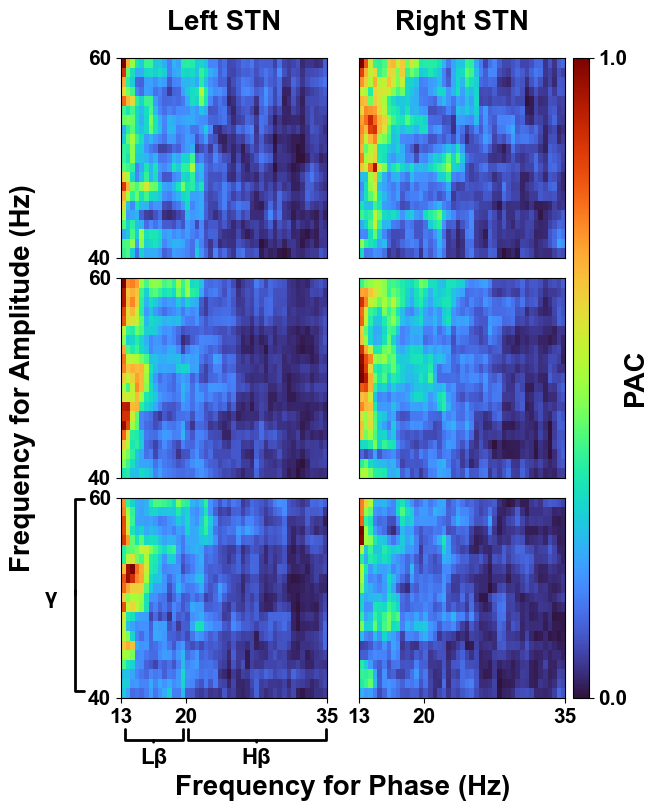

In [13]:
## Plot PAC Diagram for Ext Data Figure 5a
plt.rcParams["font.family"] = "Arial"
n_rows = 3
n_cols = 2

## locations for annotation of frequency bands
pha_min = p.f_pha.mean(-1).min()#f_pha_mid.min()
pha_max = p.f_pha.mean(-1).max()#f_pha_mid.max()
pha_range = pha_max - pha_min
Bmin = 13
Bmid = 20
Bmax = 35
BL = ((Bmid+Bmin) / 2 - pha_min) / pha_range
BH = ((Bmax+Bmid) / 2 - pha_min) / pha_range

amp_min = p.f_amp.mean(-1).min()#f_amp_mid.min()
amp_max = p.f_amp.mean(-1).max()#f_amp_mid.max()
amp_range = amp_max - amp_min
Gmin = 40
Gmax = int(amp_max)
G = ((Gmax+Gmin) / 2 - amp_min) / amp_range

kw = dict(vmin=0, vmax=1, cmap='turbo')

fig, axs = plt.subplots(n_rows,n_cols, figsize=(8,16/6*n_rows))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Frequency for Phase (Hz)', fontsize=20, labelpad=40, weight='bold')
plt.ylabel('Frequency for Amplitude (Hz)', fontsize=20, labelpad=40, weight='bold')

N = 0

for n in range(len(pac)):
        
    if n == 1: #combine OFF Post-op trials
        pac_temp_left = np.concatenate((pac[n][0],pac[n+1][0]), axis=-1).mean(-1)
        pac_temp_right = np.concatenate((pac[n][1],pac[n+1][1]), axis=-1).mean(-1)   
    else:
        pac_temp_left = pac[n][0].mean(-1) # take mean for plotting
        pac_temp_right = pac[n][1].mean(-1)
        
    pac_temp_left_norm = (pac_temp_left - pac_temp_left.min()) / (pac_temp_left.max() - pac_temp_left.min())
    pac_temp_right_norm = (pac_temp_right - pac_temp_right.min()) / (pac_temp_right.max() - pac_temp_right.min())
    
                
    if n == 2: #only plot with combined OFF Post-op  
        continue
    
    
    if N == 0:
        ptlt_left = 'Left STN'
        ptlt_right = 'Right STN'
        ptlt_size = 20
    else:
        ptlt_left = ''
        ptlt_right = ''
        ptlt_size = 0
    
    
    #if N == 5:
    #    xlbl = 'Frequency for '
    
    plt.sca(axs[N, 0])
    p.comodulogram(pac_temp_left_norm, **kw, colorbar=False, ylabel='',
                      xlabel='', fz_title=ptlt_size)
    if N == 0:
        plt.title('Left STN', pad=20, fontsize=20, weight='bold')
        
        
    plt.sca(axs[N, 1])
    
    p.comodulogram(pac_temp_right_norm, **kw, colorbar=False, ylabel='',
                      xlabel='', fz_title=ptlt_size)
    #axs[N,0].text()
    if N == 0:
        plt.title('Right STN', pad=20, fontsize=20, weight='bold')
    
    if N == n_rows-1:
        axs[N, 0].set_xticks([Bmin,Bmid,Bmax])
        axs[N, 0].set_xticklabels([Bmin,Bmid,Bmax],fontsize=15, weight='bold')
        axs[N, 1].set_xticks([Bmin,Bmid,Bmax])
        axs[N, 1].set_xticklabels([Bmin,Bmid,Bmax],fontsize=15, weight='bold')
        
        axs[N, 0].annotate('Lβ', weight='bold', xy=(BL, -0.2), xytext=(BL, -0.35),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=1.3, lengthB=.5', lw=2.0))
        
        axs[N, 0].annotate('Hβ', weight='bold', xy=(BH, -0.2), xytext=(BH, -0.35),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=3.1, lengthB=.5', lw=2.0))
        
        axs[N, 0].annotate(' ', weight='bold', xy=(-0.22, G), xytext=(-0.22, G),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=4.3, lengthB=.4, angleB=90', lw=2.0))
        axs[N, 0].text(5.5, 50,'γ',weight='bold', 
            fontsize=16, ha='center', va='center')
        
        #axs[N, 0].text(0, 50, 'OFF', weight='bold')
        
    else:
        axs[N, 0].set_xticks([])
        axs[N, 0].set_xticks([], minor=True)
        axs[N, 1].set_xticks([])
        axs[N, 1].set_xticks([], minor=True)
        
    axs[N, 0].set_yticks([Gmin, Gmax])
    axs[N, 0].set_yticklabels([Gmin, Gmax], fontsize=15, weight='bold')
    
    axs[N, 1].set_yticks([])
    N = N + 1
#fig.text(0.04, 0.5,'Frequency for\namplitude (Hz)', va='center', rotation='vertical')
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.84, top=0.9, hspace=0.1)  
cax = plt.axes((0.85, 0.1, 0.02, 0.8))
cbar = plt.colorbar(cax=cax, ticks=[0.0,1.0])
#cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels([0.0,1.0],fontsize=15, weight='bold')
cbar.set_label(label='PAC', fontsize=20, weight='bold', labelpad=-3)